In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading and Cleaning**

In [ ]:
df=pd.read_csv('/content/WineQT.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# **Null value check**

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.shape

(1143, 13)

# **Descriptive statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Train Test Split**

In [ ]:
x= df.drop(columns=["quality"])
y= df["quality"]

In [ ]:
scaler= StandardScaler()
ss_x= scaler.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(ss_x, y, test_size=0.2, random_state=42)

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier( random_state=0)

In [ ]:
rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=0)

In [ ]:
ypred_rf = rf.predict(xtest)

In [ ]:
ypred_rf

array([5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 7, 6, 6, 5, 5, 6, 5, 5, 7, 6, 5,
       5, 7, 5, 5, 7, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 7, 5, 5, 5, 6, 6, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6,
       7, 6, 5, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 6])

# **Stochastic Gradient Descent**

In [ ]:
sgd = SGDClassifier(random_state=0)

In [ ]:
sgd.fit(xtrain, ytrain)

SGDClassifier(random_state=0)

In [ ]:
ypred_sgd = sgd.predict(xtest)

In [ ]:
ypred_sgd

array([5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 7, 7,
       5, 6, 5, 5, 7, 6, 5, 5, 5, 5, 7, 5, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5,
       5, 5, 5, 7, 5, 5, 7, 5, 5, 7, 6, 7, 5, 5, 7, 5, 7, 5, 5, 7, 6, 5,
       7, 5, 5, 7, 7, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 3, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 7,
       6, 4, 7, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5,
       5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 6, 5, 6, 5, 7, 5, 7, 6,
       6, 7, 5, 7, 7, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 7, 7, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 7, 7, 5, 5, 5, 6,
       7, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 5, 7, 5, 5, 4, 5, 7, 5, 7, 6,
       5, 5, 5, 5, 5, 6, 5, 7, 7])

# **Support Vector Classifier (SVC)**

In [ ]:
svc = SVC(random_state=0)

In [ ]:
svc.fit(xtrain, ytrain)

SVC(random_state=0)

In [ ]:
ypred_svc = svc.predict(xtest)

In [ ]:
ypred_svc

array([5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 7, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 6, 6])

In [ ]:
print("Random Forest Accuracy:", accuracy_score(ytest, ypred_rf))
print("SGD Classifier Accuracy:", accuracy_score(ytest, ypred_sgd))
print("SVC Accuracy:", accuracy_score(ytest, ypred_svc))

Random Forest Accuracy: 0.6899563318777293
SGD Classifier Accuracy: 0.5152838427947598
SVC Accuracy: 0.6375545851528385


After evaluating multiple models—Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC)—Random Forest has emerged as the best performing model for predicting wine quality.
Random Forest achieved the highest accuracy among the models, indicating it can better classify wine quality based on chemical properties.

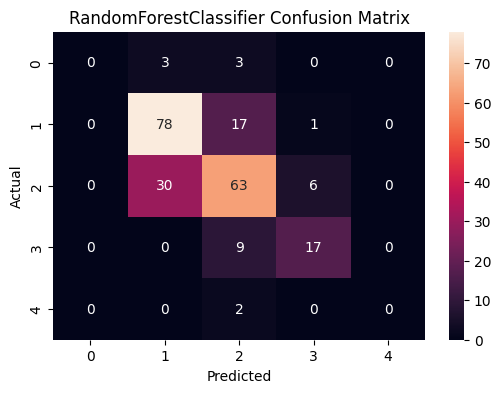

In [ ]:
cm = confusion_matrix(ytest, ypred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="rocket", fmt="d")
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
new_sample = np.array([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])
predict_value = scaler.transform(new_sample)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print("\nPrediction for New Wine Sample:")
print(rf.predict(predict_value)[0])


Prediction for New Wine Sample:
5


In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


# **Visualizations**

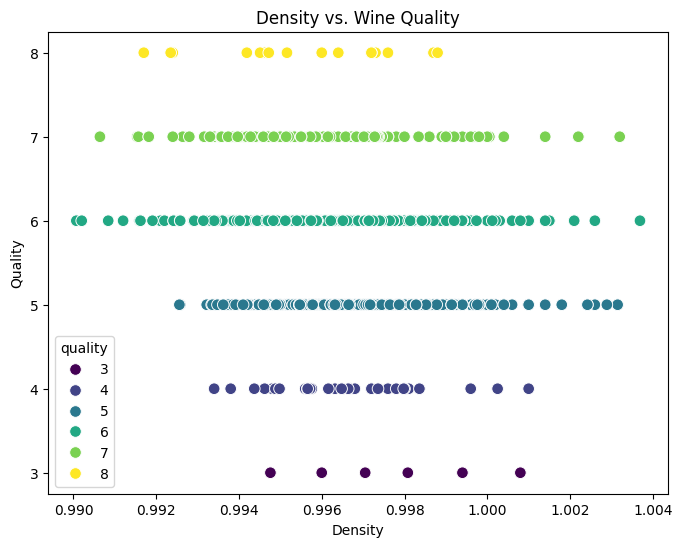

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="density", y="quality", data=df, hue="quality", palette="viridis", s=70)
plt.title("Density vs. Wine Quality")
plt.xlabel("Density")
plt.ylabel("Quality")
plt.show()


In [ ]:
chemicals = df[["density", "fixed acidity", "volatile acidity", "pH",
                "quality",'citric acid','chlorides','sulphates','alcohol']]

In [ ]:
chemicals

,density,fixed acidity,volatile acidity,pH,quality,citric acid,chlorides,sulphates,alcohol
0,0.99780,7.4,0.700,3.51,5,0.00,0.076,0.56,9.4
1,0.99680,7.8,0.880,3.20,5,0.00,0.098,0.68,9.8
2,0.99700,7.8,0.760,3.26,5,0.04,0.092,0.65,9.8
3,0.99800,11.2,0.280,3.16,6,0.56,0.075,0.58,9.8
4,0.99780,7.4,0.700,3.51,5,0.00,0.076,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1138,0.99574,6.3,0.510,3.42,6,0.13,0.076,0.75,11.0
1139,0.99651,6.8,0.620,3.42,6,0.08,0.068,0.82,9.5
1140,0.99490,6.2,0.600,3.45,5,0.08,0.090,0.58,10.5
1141,0.99512,5.9,0.550,3.52,6,0.10,0.062,0.76,11.2


In [ ]:
corr_matrix = chemicals.corr()

In [ ]:
corr_matrix

,density,fixed acidity,volatile acidity,pH,quality,citric acid,chlorides,sulphates,alcohol
density,1.000000,0.681501,0.016512,-0.352775,-0.175208,0.375243,0.208901,0.143139,-0.494727
fixed acidity,0.681501,1.000000,-0.250728,-0.685163,0.121970,0.673157,0.107889,0.174592,-0.075055
volatile acidity,0.016512,-0.250728,1.000000,0.221492,-0.407394,-0.544187,0.056336,-0.276079,-0.203909
pH,-0.352775,-0.685163,0.221492,1.000000,-0.052453,-0.546339,-0.277759,-0.185499,0.225322
quality,-0.175208,0.121970,-0.407394,-0.052453,1.000000,0.240821,-0.124085,0.257710,0.484866
citric acid,0.375243,0.673157,-0.544187,-0.546339,0.240821,1.000000,0.245312,0.331232,0.106250
chlorides,0.208901,0.107889,0.056336,-0.277759,-0.124085,0.245312,1.000000,0.374784,-0.229917
sulphates,0.143139,0.174592,-0.276079,-0.185499,0.257710,0.331232,0.374784,1.000000,0.094421
alcohol,-0.494727,-0.075055,-0.203909,0.225322,0.484866,0.106250,-0.229917,0.094421,1.000000


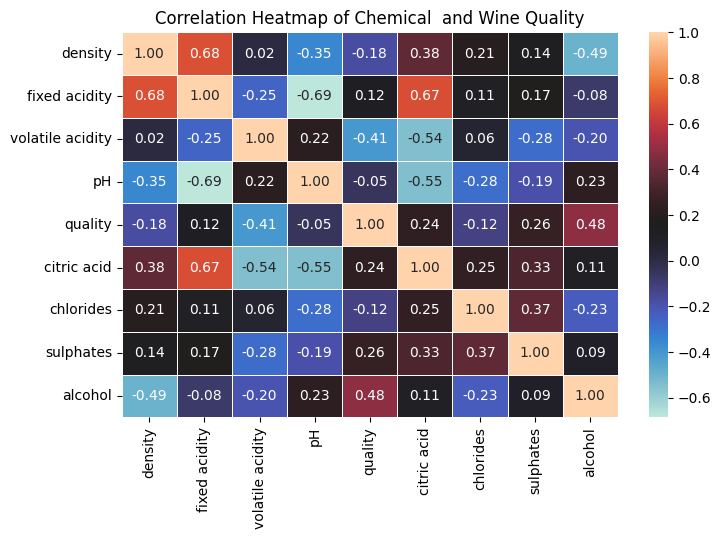

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="icefire", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Chemical  and Wine Quality")
plt.show()


<ipython-input-55-11d6b5f82c45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="magma")


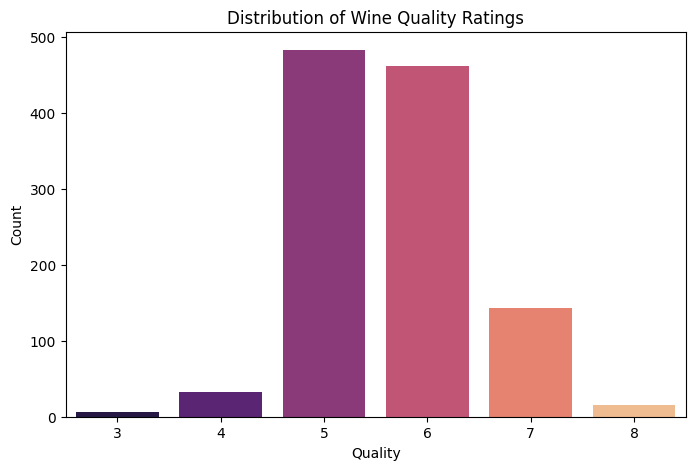

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=df, palette="magma")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

<ipython-input-59-586482d8e1d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quality", y="alcohol", data=df, palette="vlag")


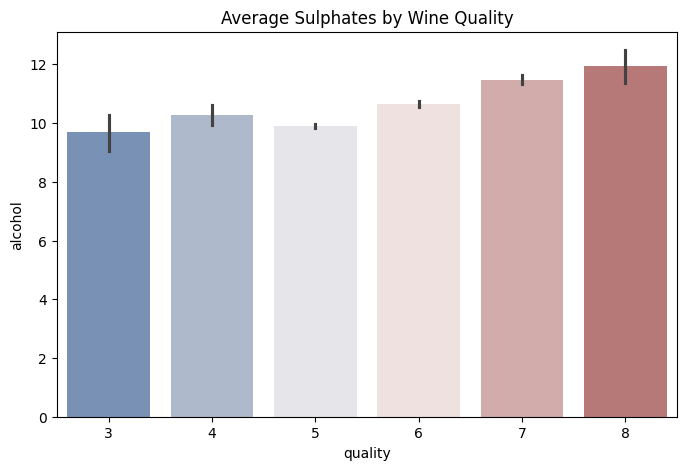

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="quality", y="alcohol", data=df, palette="vlag")
plt.title("Average Sulphates by Wine Quality")
plt.show()


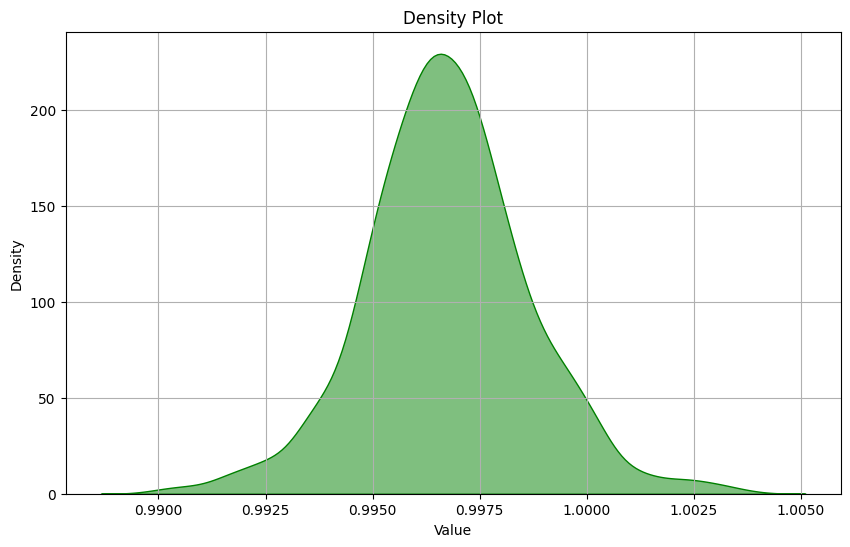

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['density'], fill=True, color='green', alpha=0.5)
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<ipython-input-64-7069e6b3e37b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quality", y="pH", data=df, palette="muted")


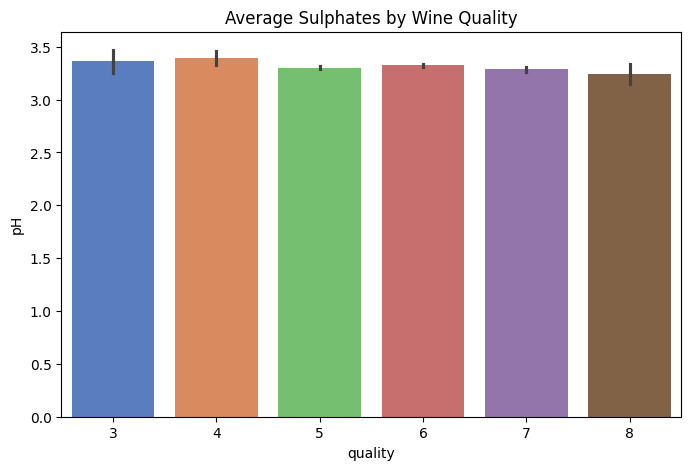

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="quality", y="pH", data=df, palette="muted")
plt.title("Average Sulphates by Wine Quality")
plt.show()